# DO THIS :  

### *** Names: [Insert Your Names Here;      Optional: indicate preferred pronouns]***

# AND IN THE FILENAME

##### Problem Set 14     Part A
## PHYS 105A   Spring 2019

## Contents

Yet more matplotlib (widgits!), timing the execution of code, and Mandelbrot and Julia fractal sets.

** There are 9 exercises that must be completed (total in parts A and B). **

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

from numba import jit


In this problem set we will lean a bit about another form of fractal, the iterated map.
We'll also learn about `numba`, the "just-in-time" compiler for Python, and 
some about using matplotlib to make an interactive GUI (graphical user interface).

There will be three notebooks for this problem set. Only the first two will have exercises.

Most of us will think of an *orbit* as the trajectory of a mass moving in a gravitational field. A more mathematical definition is a collection of points
in the phase space of a dynamical system. For example, the two-dimensional phase space for a simple pendulum (constrained to move in a plane) has as one dimension the angle of the bob $\theta$ and as the other the bob's angular velocity $d\theta/dt$. For small amplitudes of oscillation, the orbit of the pendulum in this phase space is a circle.

In a dynamical system, an *evolution function* takes the current point in the orbit and maps it to the next point. In the two examples just given, this mapping is a continuous function, and the orbit is a continuous curve. The parameter which changes as we move along the orbit is the time. 

At any point on the orbit $p$, the evolution function takes that point to a new point $p+dp$. 

For the case of the pendulum, we can define a point in phase space by $p = (\theta, d\theta/dt)$. You all know how to determine the angular acceleration of the pendulum bob $a(\theta)$. With this, we can map the current point to a new point further along the orbit, $p+dp$, with $dp$ given in terms of $dt$ as

$$ \begin{split} d\theta &= \left(\frac{d\theta}{dt}\right) dt \\
                 d\left(\frac{d\theta}{dt}\right) &= a(\theta) dt\end{split} $$

One can also define a dynamical system in which the mapping is *discrete*. Instead of having a continuous parameter like time, we simply count the number of times we apply the evolution function. So, if we start at a point $z_0$ in the phase space, the orbit is then the set of points $z_0, z_1, z_2, \dots$ given by repeatedly applying some function $f(z)$

$$ z_{n+1} = f(z_n) $$

The iterated map fractal sets we will look at are generated by the behavior of orbits as a function of the point in the phase space used as the initial conditions.

Perhaps the most famous of these fractal sets is known as the Mandelbrot set, named after Benoit Mandelbrot. Here, we choose as our phase space the complex plane. We will choose the origin $z_o=0$ as our starting point for all orbits and explore the orbits  generated by the iterated map

$$ z_{n+1} = f_c(z_n) = z_n^2 + c $$

at each point $c$ of the complex plane.

It turns out that there are two possible classes of orbits. The first starts at zero and becomes larger in magnitude at each iteration. These trajectories go off to infinity; they are said to diverge. For example, take the orbit with $c=1$ on the real axis. Starting at $z=0$, this trajectory is along the real axis, with the first few values

$$ z_n = 0, 1, 2, 5, 26, 677, \dots $$

Let's write some Python code to visualize this

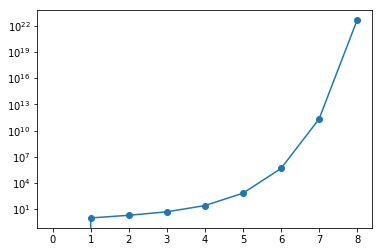

In [3]:
def iterf(c,n):
    z = np.zeros(n, dtype=np.complex64) # has both complex and real parts 
    for i in range(1,n):     # and goes for n iterations
        z[i] = z[i-1]**2 + c
    return z

c = 1

orbit = iterf(c,10) # make a list of values for successive iteration numbers

fig, ax = plt.subplots()
ax.semilogy(orbit[-20:].real,'o-')

This trajectory diverges, and it does so very rapidly!

The other class of trajectories does not diverge. In this set, the magnitude (modulus) of $z$ is always bounded by $2$. 

#### Exercise 1

Copy the code in the preceeding cell to the following cell.

Use a starting value of $c=-11/8$. Compute the orbit for 500 iterations, but plot only the last 20 values in a linear (not semilog) plot.

You will see that the orbit is bounded in magnitude and has become periodic. Looking at the plot, what is the period of the orbit?

Now let's try a value of $c$ off the real axis.

Remember, in Python the square root of -1 is written as "1j". (Engineers use $j$, while mathematicians and physicists usually use $i$, but we'll just have to adapt!)

#### Exercise 2

This time, we'll plot the trajectory in the phase space -- the complex plane. To do this, we'll just use the real part of $z$ as the x-coordinate and the imaginary part of $z$ as the y-coordinate.

To obtain a vector of real parts from a complex numpy array X, you can just use X.real; for the imaginary part, use X.imag

Plot 30 iterations; for the value of c, use

    c = 0.2 + 0.4*1j

You can see that the orbit spirals in toward a point near 0.0236+0.419i. The orbit is said to converge.

The Mandelbrot is the set of all values $c$ which have orbits with do not diverge, whether they are periodic or converge.

We can draw an approximation to the Mandelbrot set by dividing the complex plane into a grid C, and then starting from $z=0$, iterating with each value of C until $|z|>2$ becomes greater than 2 or until some maximum number of iterations
has been reached.

In the following code, if the orbit diverges, we'll return 0 (False), and if it doesn't diverge in 80 iterations, we'll return 1 (True). When plotting the resulting 2D array, the black points (1) will be an approximation to the Mandelbrot set. We'll draw a circle of radius $2$ about the origin; this is the *escape radius*. Once a value of $|z|$ becomes greater than $2$, the orbit will diverge, running off to inifinity. 

In [ ]:
def onePointIterator1(c, itmax):
    z = 0
    for n in range(itmax):
        if np.abs(z)>2:
            return 1
        z = z*z + c
    return 0

def mandelbrotSet1(extent, itmax, npix):

    cr = np.linspace(extent[0], extent[1], npix)
    ci = np.linspace(extent[2], extent[3], npix)

    M = np.zeros( (npix,npix) )

    for i in range(npix):
        for j in range(npix):
            M[j,i] = onePointIterator1(cr[i]+ci[j]*1j, itmax)

    return M

extent = [-2.5, 1.5, -1.5,1.5] 
        
M = mandelbrotSet1(extent, 80, 401)
fig, ax = plt.subplots( figsize=(8,8) )

ax.imshow( M, cmap="gnuplot2", extent=extent, origin='lower')
ax.set_xlabel("real(c)")
ax.set_ylabel("imag(c)")

circ = plt.Circle( [0,0], 2, fill=False, color='red')
ax.add_patch(circ)
ax.autoscale()

This is such a simple dynamical system, yet the set of parameters $c$ corresponding to bound orbits is surprisingly -- nay, astroundingly -- complex. You can see that it might be a fractal, since there are copies of the second-largest bulb at various scales scattered throughout the set. Later on, we'll find evidence that there are an infinite number of these copies.

It is mathematically interesting, as well as visually beautiful, to color this plot by the rate of orbit divergence. We'll leave the bound orbits in black, but we'll count the number of iterations until $|z_n|>2$ for each diverging orbit and then use that to color the plot.

This is just a small change to our code

In [ ]:
def onePointIterator2(c, itmax):
    z = 0
    for n in range(itmax):
        if abs(z)>2:
            return n
        z = z*z + c
    return 0

def mandelbrotSet2(extent, itmax, npix):
    
    cr = np.linspace(extent[0], extent[1], npix)
    ci = np.linspace(extent[2], extent[3], npix)

    M = np.zeros( (npix,npix) )

    for i in range(npix):
        for j in range(npix):
            M[j,i] = onePointIterator2(cr[i]+ci[j]*1j, itmax)

    return M

extent = [-2.5, 1.5, -1.5,1.5] 
        
M = mandelbrotSet2(extent, 80, 801)
fig, ax = plt.subplots( figsize=(8,8) )

ax.imshow( M, cmap="gnuplot2", extent=extent, origin='lower')
ax.set_xlabel("real(c)")
ax.set_ylabel("imag(c)")


There is clearly structure there, but the colors are a bit dark to see it well. Let's look at a histogram of the pixel values -- the number of iterations.

#### Exercise 3

Make a histogram of the pixel values in the array M we just computed.

Note that you need to turn the 2D array M into a 1D array, otherwise `matplotlib` tries to give you a histogram for each row in the matrix. That would be 801 histograms!

The .flatten() method transforms an array of any dimensions into a 1D array, so M.flatten() is a 1D array containing all of the elements of M.

Make your histogram have 100 bins.

Use plt.hist; this should be a two-liner! (one to make the figure and axes, and one to make the histogram)

As you can see from your histogram, there are a lot of pixels with values close to zero, and not very many with higher values. Of course, these higher values are the interesting ones!

This is much like looking at a photograph which is dominated by shadows.

We can transform the distribution of pixel values to get a better distribution by raising the pixel values to a power $\gamma$ smaller than one. Let's try $\gamma=0.3$

#### Exercise 4

Make a histogram of the pixel values raised to the power 0.3 -- another two-liner!

This is much better, with more pixel values near the middle of the range. Let's try plotting the Mandelbrot set using this transformation.

In [ ]:
fig, ax = plt.subplots( figsize=(8,8) )

ax.imshow( M**0.3, cmap="gnuplot2", extent=extent, origin='lower')
ax.set_xlabel("real(c)")
ax.set_ylabel("imag(c)")

Much better! We can see the detail in the image more clearly.

This process, raising the pixels of an image to a power $\gamma$ is known as a *gamma correction* and is commonly used in photography and video. It is so common, in fact, that `matplotlib` has a built-in way to do the correction. We can tell imshow to make a gamma correction for us using the `matplotlib.colors.PowerNorm(gamma)` function and supplying the normalization object it gives us to the norm argument to imshow:

In [ ]:
fig, ax = plt.subplots( figsize=(8,8) )
norm = colors.PowerNorm(0.3)
ax.imshow( M, cmap="gnuplot2", extent=extent, norm=norm)

Let's look at the value of the iteration at the lower-left corner of the plot, M[0,0]

In [ ]:
M[0,0]

This is outside of our circle of radius 2 and it was obviously a divergent orbit according to our definition; it
arrived beyond 2 at one iteration! In fact, you can faintly see a circle of radius 2 in the coloring -- the darkest blue color corresponds to one iteration.

It took a fair bit of time to compute this representation of the Mandelbrot set, and we'll be interested in even higher-resolution versions, so let's see if we can make this a bit faster.

The first thing to try is to use `numpy` to eliminate as many for loops as possible.

Instead of using a single value of z, create a numpy array z which holds the results for all values on our grid.
Then we can do all of the operations on the array z at once. This way we avoid the two for-loops in mandelbrotSet2.

We can stop the iteration when z>2 using a `numpy` mask array. This is similar to using the `numpy` where() function.
For example, 

In [ ]:
q = np.array([[0,1,1],[0,0,1],[1,1,0]])  # make an array

mask = (q>0)                             # make a mask array

print(mask)

print(q[mask])

If we use this mask array as an index, numpy will only compute using the array elements where mask is True. Thus, we can stop the iteration for those orbits which have already escaped by only computing the next iteration for values $z$ where
$|z|>2$

In [ ]:
def allPointsIteratorNumpy(c, itmax):
    
    result = np.ones( c.shape, dtype=int )      # this will hold the number of iterations until divergence
    z = np.zeros( c.shape, dtype=np.complex64 ) # The iterations all start out at zero
    z[:,:] = c                                  # but they are all c after the first iteration
    for i in range(1,itmax):
        mask = (abs(z)<2)                       # find locations where we are not done yet
        result[mask] = i                        # for those places where we are not done, save iteration number
        z[mask] = z[mask]**2 + c[mask]          # next iteration

    result[ result == itmax-1 ] = 0             # Where we haven't diverged, set image to zero
    return result

def mandelbrotSetNumpy(extent, itmax, npix):
        
    cr = np.linspace(extent[0], extent[1], npix)
    ci = np.linspace(extent[2], extent[3], npix)
    X, Y = np.meshgrid(cr, ci)
    C = X + Y*1j
    
    return allPointsIteratorNumpy(C, itmax)

extent = [-2.5, 0.5, -1.5,1.5] 
        
M = mandelbrotSetNumpy(extent, 80, 801)
fig, ax = plt.subplots( figsize=(8,8) )
norm = colors.PowerNorm(0.3)
ax.imshow( M, cmap="gnuplot2", extent=extent, norm=norm, origin='lower')

This certainly seemed to be much faster!

Let's try to quantify the performance of our two methods. To do this, we can use the %timeit
function in Jupyter-Notebook. It will run the function several times and compute the average time it took to run.
So as not to have to wait as long, we'll pass a smaller npix argument.

In [ ]:
extent = [-2.5, 1.5, -1.5,1.5]
print("With for loops:")
%timeit mandelbrotSet2(extent, 80, 512)
print("With numpy:")
%timeit mandelbrotSetNumpy(extent, 80, 512)

Not bad... the `numpy` version was more than 10 times faster.

There is another way to achieve higher speeds in Python. It is somewhat more experimental, but seems to work in many cases quite well.

To understand how this works, we need to make a distinction between two kinds of computer languages. The first kind is a *compiled* language. For such languages (C, C++, Fortran, and many others), you give you program to a *compiler* which looks at the entire program at once. This compiler may take a while to run, but it is able to make many changes to your code which, while not changing the result, allow it to run much faster -- this is known as compiler *optimization* and is one of the reasons that code in compiled languages usually run much faster than others.

The other class of computer languages is the *interpreted* languages, of which Python is one. Interpreted languages run an *interpreter* which is in many ways like a compiler, but only considers you code one line at a time, executing it before moving on to the next. This prevents an interpreted language from doing much in the way of optimization. The other side of the coin is that a user doesn't have to wait for their program to be compiled. When you hit shift+enter in a notebook, this means you don't have to wait several seconds to minutes for your code to compile -- it starts right away even though it may not finish as quickly. 

Over the past decade or so, this distinction has begun to blur as the designers of interpreted languages have begun to incorporate features of compiled languages. One such attempt in the "just in time" compiler. Such a compiler only compiles code right when it is about to be executed. The first execution of a compiled function is thus somewhat slower, but after that, any subsequent calls to the function run much more quickly.

The `numba` package provides a just in time compiler for Python. To signal to Python that you want to use just-in-time compilation for a function, you use the Python *decorator* @jit from the `numpy` module just before the function definition. Using just in time compilation often avoids most of the penalty for using otherwise slow language constructs like for loops in Python.

Let's try using just in time compilation in our for-loop based method for computing the Mandelbrot set. We simply import jit from `numba`, and then decorate the onePointIterator and mandelbrotSet functions:

In [ ]:
from numba import jit
import numba as nb

@jit
def onePointIteratorJIT(c, itmax):
    z = 0
    for n in range(itmax):
        if np.abs(z) > 2:
            return n
        z = z*z + c
    return 0

@jit
def mandelbrotSetJIT(extent, itmax, npix):
    
    cr = np.linspace( extent[0], extent[1], npix )
    ci = np.linspace( extent[2], extent[3], npix )

    M = np.zeros( (npix,npix), dtype=np.int32)

    for i in range(npix):
        for j in range(npix):
            M[j,i] = onePointIteratorJIT( cr[i]+ci[j]*1j, itmax )

    return M

extent = np.array([-2.5, 1.5, -1.5,1.5])
        
M = mandelbrotSetJIT(extent, 80, 801)
fig, ax = plt.subplots( figsize=(8,8) )

norm = colors.PowerNorm(0.3)
ax.imshow( M, cmap="gnuplot2", extent=extent, norm=norm, origin='lower')
ax.set_xlabel("real(c)")
ax.set_ylabel("imag(c)")

The result at least looks correct and it certainly seems faster. Let's try timing the code with the same npix as used above.

#### Exercise 5

Use the %timeit function to time the mandelbrotSetJIT function, using 80 iterations and 512 pixels 

In [ ]:
extent = [-2.5, 1.5, -1.5,1.5]
print("Using numba/JIT:")
%timeit mandelbrotSetJIT(extent, 80, 512)

This is four to five times as fast as the `numpy` version, and 60 times as fast as the native Python without @jit. This is the version we will use from now on.

@jit is not magic; sometimes it doesn't work as well as in this example, but clearly it is well worth having jit in you computational toolbox!

Another advantage of using @jit is that you may be more comfortable programming in the for-loop style rather than having to figure out how to express your algorithm as `numpy` vector operations.

### Continuous coloring

Because we count the number of iterations until the value of $|z|>R$, (where we have used $R=2$) we see discrete regions of color in these plots.

It would be nice to have a continuous analog of this interation count which would interpolate between values. If we ignore the constant term in the iteration, we have $z = z^2$. Once $|z|\gg c$, tghe value of $c$ doesn't matter much to the orbit, and so for divergent orbits we have the progression 

$$|z|, |z|^2, |z|^4, |z|^8, |z|^{16}, \dots$$

The log of this sequence is 

$$ |z|, 2|z|, 4|z|, 8|z|, 16|z|, \dots$$

and the log log of the sequence is

$$\log |z|, (\log 2 + \log |z|), (\log 4 + \log |z|), (\log 8 + \log |z|), (\log 16 + \log |z|), \dots$$

which, if we subtract off $\log |z|$ and use a base-2 logarithm, is 

$$ 0, 1, 2, 3, 4, \dots$$

This is just our integer sequence! So using the $\log\log |z|$ of the iterates can give us a continuous function which
approaches our integer sequence.

Doing this a bit more carefully, one finds that a good continuous formula to use for coloring the divergent regions of the Mandelbrot plot is

$$ n - \frac{\log(\log(|z_n|))}{\log(2)} + \frac{\log(\log(R))}{\log(2)} $$

Let's modify our onePointIteratorJIT function to use this continuous value

In [ ]:
@jit
def onePointIteratorJIT(c, itmax, R, llR):
    z = c
    for n in range(itmax):
        az = np.abs(z)
        if az > R:
            return n - np.log( np.log( az ))/np.log(2) + llR
        z = z*z + c
    return 0

@jit
def mandelbrotSetJIT(extent, itmax, npix):
    
    R = 2.0**40
    llR = np.log( np.log( R ) ) / np.log(2)
    
    cr = np.linspace( extent[0], extent[1], npix )
    ci = np.linspace( extent[2], extent[3], npix )

    M = np.zeros( (npix,npix), dtype=np.float32)

    for i in range(npix):
        for j in range(npix):
            M[j,i] = onePointIteratorJIT( cr[i]+ci[j]*1j, itmax, R, llR )

    return M

extent = np.array([-2.5, 1.5, -1.5,1.5])
        
M = mandelbrotSetJIT(extent, 80, 801)
fig, ax = plt.subplots( figsize=(8,8) )

norm = colors.PowerNorm(0.3)
ax.imshow( M, cmap="gnuplot2", extent=extent, norm=norm, origin='lower')
ax.set_xlabel("real(c)")
ax.set_ylabel("imag(c)")


This gives a more pleasing representation, without the stair-stepping of the colors, but the plot is basically the same as before.

You may be waiting to ask: What if we don't start the iteration at zero?

Good question! There is another object which is in some sense the *dual* to the Mandelbrot set, where you pick a fixed value of c for the entire plot and then start the iteration on z at the different values on our grid over the complex plane. The resulting set of points where the iteration does not diverge is known as the Julia set.

Let's modify our jit version of the Mandelbrot set to plot a Julia set. 


In [ ]:
@jit
def onePointIterator(constValue, z0, itmax, R, llR):
    """
    For a Mandelbrot set: set constValue to points on the complex plane, and set z0 to zero.
    For a Julia set: set constValue to a particular complex value, and then let z0 run over the complex plane.
    """
    
    z = z0
    for n in range(1,itmax):
        az = np.abs(z)
        if az > R:
            return n - np.log( np.log( az ))/np.log(2) + llR
        z = z*z + constValue
    return 0

@jit
def mandelbrotSet(extent, itmax, npix):
    
    R = 2.0**40
    llR = np.log( np.log( R ) ) / np.log(2)
    
    cr = np.linspace( extent[0], extent[1], npix )
    ci = np.linspace( extent[2], extent[3], npix )

    M = np.zeros( (npix,npix), dtype=np.float32)

    for i in range(npix):
        for j in range(npix):
            c = cr[i]+ci[j]*1j
            z0 = 0.0 + 0.0*1j
            M[j,i] = onePointIterator( c, z0, itmax, R, llR )

    return M

@jit
def juliaSet(c, extent, itmax, npix):
    
    R = 2.0**40
    llR = np.log( np.log( R ) ) / np.log(2)
    
    cr = np.linspace( extent[0], extent[1], npix )
    ci = np.linspace( extent[2], extent[3], npix )

    M = np.zeros( (npix,npix), dtype=np.float32)

    for i in range(npix):
        for j in range(npix):
            z0 = cr[i]+ci[j]*1j
            M[j,i] = onePointIterator( c, z0, itmax, R, llR )

    return M

extent = np.array([-2, 2, -2, 2])
        
J = juliaSet(0+0*1j, extent, 80, 801)
fig, ax = plt.subplots( figsize=(8,8) )

norm = colors.PowerNorm(0.3)
ax.imshow( J, cmap="gnuplot2", extent=extent, norm=norm, origin='lower')
ax.set_xlabel("real(c)")
ax.set_ylabel("imag(c)")


Not very interesting! But not very surprising. If we are just iterating $z_{n+1} = z_n^2$, every starting value with $|z|<1$ will converge to zero, and every other starting value will diverge. Moreover, the larger the starting value, the sooner the iteration will pass $R=2$.

Let's try another location for our value of $c$. Trying $c = -0.75011 + 0.17476 i$, and adding more iterations, we have

In [ ]:
extent = np.array([-1.5, 1.5, -1.5,1.5])
    
c = -0.75011+0.17476*1j
J = juliaSet(c, extent, 512, 801)
fig, ax = plt.subplots( figsize=(8,8) )

norm = colors.PowerNorm(0.3)
ax.imshow( J, cmap="gnuplot2", extent=extent, norm=norm, origin='lower')
ax.set_xlabel("real(c)")
ax.set_ylabel("imag(c)")

#### Exercise 6

Copying the previous code into the next three cells, make plots of Julia sets for:

    c = -0.97802 + 0.26052 i
    c = -0.75011 + 0.17476 i
    c =  0.37952 + 0.08516 i

All this is interesting, remarkably complex, and visually striking, but what is the connection between the Julia set and the Mandelbrot set? This, it turns out, is quite complex; for now, we will just try to get an intuitive idea by looking at a number of example Julia sets and trying to relate them to the behavior of the Mandelbrot set at that point in the complex plane.

To explore the Mandelbrot and Julia sets, it would be useful to create a program where one could easily zoom in, pick a point in the Mandelbrot set and compute its associated Julia set.

To do so, please download and run the notebook ProblemSet14_PartB.